In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize # optimizers
import scipy.constants as cnst

from tqdm.notebook import tqdm # loading bars

# plt.style.use('unirand')
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

In [6]:
# import matplotlib.pyplot as plt
# import scienceplots

# plt.style.use('science')



In [10]:
# nature
wavelen_red=1064E-9
wavelen_green=532E-9
# amu=1.6605E-27 # atomic mass unit
amu=cnst.u # atomic mass unit
mass=6.01512289*amu # mass lithium
# h=6.6260715E-34 # planck constant
h=cnst.h # planck constant
gamma=2*np.pi*5.8724*1E6 # in 1/MHz, lithium linewidth of D1/D2-line
# c=3E8 # in m/s
c=cnst.c # in m/s
omega0=2*np.pi*c/671E-9 # Hz, D1
# k_B=1.380649e-23 # in J/K
k_B = cnst.k
# # chosen
# a_l=6.1E-6
# a_s=3.05E-6
# xy-lattice:
a_l=2.3E-6
a_s=1.15E-6


# derived quantities (in case you need it)
alpha=2*np.arcsin(wavelen_red/2/a_l)*360/2/np.pi # interference angle
E_rl=h**2/8/mass/a_l**2 # in units of 
E_rs=h**2/8/mass/a_s**2

In [13]:
alpha

26.747752634412144

# Lattice depth

In [11]:
def U(I_0,omega,omega0,gamma):
    alpha=3*np.pi*c**2/2/omega0**3*(1/(omega-omega0)+1/(omega+omega0))*gamma
    print(alpha)
    return alpha*I_0 # in J

def lattice_depth(P,w_eff,wav): #power per lattice
    I_0=8*P/2/np.pi/w_eff**2
    omega=2*np.pi*c/wav
    return U(I_0=I_0,omega=omega,omega0=omega0,gamma=gamma) #in J

def get_evenly_spaced(array,num):
    idx = np.round(np.linspace(0, len(array) - 1, num)).astype(int)
    return array[idx]

def onsite_freq(P,w_eff,wav, latt_space):
    U=abs(lattice_depth(P,w_eff,wav))
    return np.sqrt(2*U/mass)*np.pi/latt_space

def conf_freq(U_rec,w_eff,E_rec):
    return 2/w_eff*np.sqrt(U_rec*E_rec/mass)

def aconf_freq(U_rec, w_eff, E_rec):
    return np.sqrt(2)/w_eff*(U_rec*E_rec**2/mass**2)**(1/4)

## y lattice

In [14]:
alpha_y_deg = 14 #deg, interference HALF angle
alpha_y = np.deg2rad(alpha_y_deg) #rad, interference HALF angle
al_y  = wavelen_red/(2*np.sin(alpha_y))
as_y  = wavelen_green/(2*np.sin(alpha_y))

In [20]:
print("Interference half angle:", alpha_y_deg, "degrees")
print("Short lattice constant", as_y*1e6, "um")

Interference half angle: 14 degrees
Short lattice constant 1.0995284215207075 um


## For one specific set of parameters

In [12]:
# w_major=200E-6 # in m
# w_minor=100E-6 # in m
# xy-lattice:
w_major=100E-6 # in m
w_minor=100E-6 # in m
P=4 # in W
I_0=8*P/2/np.pi/w_major/w_minor
omega_red=2*np.pi*c/1064E-9
omega_green=2*np.pi*c/532E-9

U_red=-U(I_0=I_0,omega=omega_red,omega0=omega0,gamma=gamma)
U_green=U(I_0=I_0,omega=omega_green,omega0=omega0,gamma=gamma)

# plotting for z
long_latt=6.1E-6 # lattice parameter in m
halfangle=10*np.pi/360

print("U_red in E_rl", U_red/E_rl)
print("U_green in E_rs", U_green/E_rs)
print("\n")
print("U_red in uK", U_red/k_B*1E6)
print("U_green in uK", U_green/k_B*1E6)
print("\n")
print("U_red onsite-freq in 2pi*kHz", np.sqrt(2*U_red/mass)*np.pi/long_latt/1E3/2/np.pi)
print("U_green onsite-freq in 2pi*kHz", 2*np.sqrt(2*U_green/mass)*np.pi/long_latt/1E3/2/np.pi)
print("\n")
print("Conf-freq-maj in 2pi*Hz", 2*np.cos(halfangle)/w_major*np.sqrt(U_red/mass)/2/np.pi)
print("Conf-freq-min in 2pi*Hz", 2/w_minor*np.sqrt(U_red/mass)/2/np.pi)
print("\n")
print("Aconf-freq-maj in 1j*2pi*Hz", np.sqrt(2)*np.cos(halfangle)/w_major*(U_green*E_rs/mass**2)**(1/4)/2/np.pi)
print("Aconf-freq-min in 1j*2pi*Hz", np.sqrt(2)/w_minor*(U_green*E_rs/mass**2)**(1/4)/2/np.pi)

-5.262193843977613e-37
1.0728733273187998e-36
U_red in E_rl 258.0202310309532
U_green in E_rs 131.5150258568287


U_red in uK 19.411257442591797
U_green in uK 39.57630786199498


U_red onsite-freq in 2pi*kHz 18.98811927185354
U_green onsite-freq in 2pi*kHz 54.22539818875944


Conf-freq-maj in 2pi*Hz 519.4229533064849
Conf-freq-min in 2pi*Hz 521.4070646044014


Aconf-freq-maj in 1j*2pi*Hz 154.86493650918038
Aconf-freq-min in 1j*2pi*Hz 155.45649540780624


In [6]:
# ratios:
# g/r
Uabs_ratio=U_green/U_red #U_g/U_r in absolute terms
Erl_ratio=E_rs/E_rl #E_rs/E_rl
Urec_ratio=Uabs_ratio/Erl_ratio #Urec g/r
wonsite_ratio=2*np.sqrt(Uabs_ratio) #w_g/w_r
# min/maj
w_conf_ratio= 1/np.cos(alpha/2*2*np.pi/360)*w_major/w_minor# min/maj

for x in ["Uabs_ratio","Erl_ratio","Urec_ratio","wonsite_ratio","w_conf_ratio"]:
    print("{}: {:.2f}".format(x,globals()[x]))

Uabs_ratio: 2.04
Erl_ratio: 4.00
Urec_ratio: 0.51
wonsite_ratio: 2.86
w_conf_ratio: 2.01


## Lattice depth in recoils (long lattice)

In [8]:
# thesis plotting
textwidth=5.78853 #in
ratio=1.2
lengo=0.45*textwidth*ratio
fig=plt.figure(figsize=(lengo*ratio,lengo))

<Figure size 375.097x312.581 with 0 Axes>

1.0728733273187998e-36


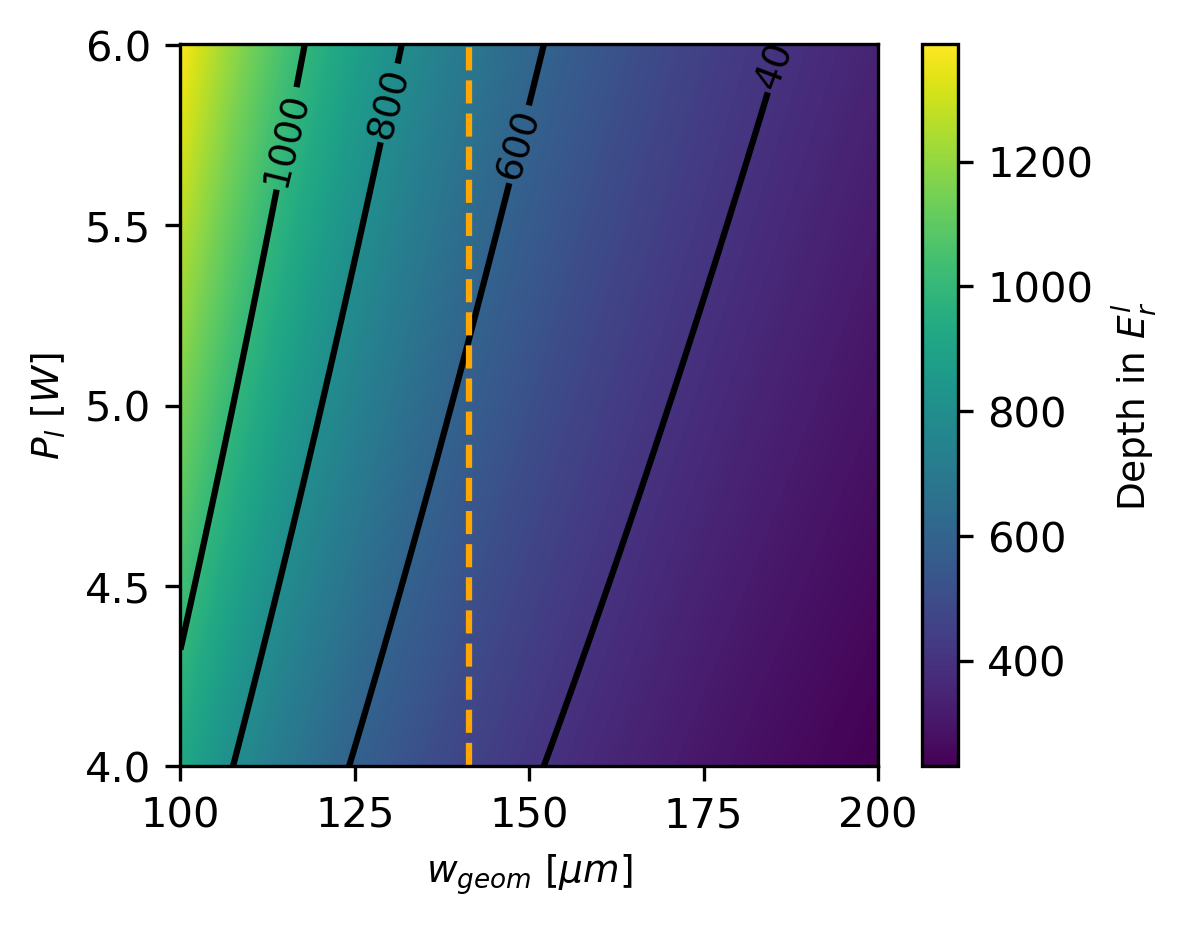

In [11]:
### long lattice ###
# lattice depth calulcation for graphs
w_effs=np.linspace(100, 200,10001)*1E-6 #w_eff=sqrt(w_x*w_y)
powers=np.linspace(4, 6,1001)
x,y=np.meshgrid(w_effs,powers)


Ug_abs=1*lattice_depth(y,x,wavelen_green)
Ug_rec=Ug_abs/E_rs

fig, ax = plt.subplots(figsize=(lengo*ratio,lengo), dpi=300)
im = ax.imshow(Ug_rec, origin="lower", aspect="auto")


plt.xticks(get_evenly_spaced(np.arange(len(w_effs)),5),(get_evenly_spaced(w_effs,5)*1E6).round(decimals=0).astype(int))
cs = ax.contour(Ug_rec,[0,200,400,600,800,1000], colors=['black'])
ax.clabel(cs, inline=True, fontsize=9)
ax.set_yticks(get_evenly_spaced(np.arange(len(powers)),5),(get_evenly_spaced(powers,5)).round(decimals=1))
ax.set_xlabel("$w_{geom} \ [\mu m]$", fontsize=9)
ax.set_ylabel("$P_{l}$ [$W$]",fontsize=9)
cbar=fig.colorbar(im, ax=ax)
cbar.set_label(label='Depth in $E_{r}^l$', size=9)
# cbar.ax.tick_params(labelsize=15)
# cbar.ax.label_params.set_size(20)
# plt.grid()
ax.set_ylim(0,len(powers))

# Plot our choice
w_eff_ours=np.sqrt(100*200)*1E-6
w_eff_where=round((w_eff_ours-w_effs[0])*len(w_effs)/(w_effs[-1]-w_effs[0]))
plt.plot(2*[w_eff_where,],[0,len(powers)], linestyle="--", color="orange", markersize=10)
# plt.show()
# plt.savefig("images/lparam_lattice-depth.pdf",bbox_inches="tight")
# plt.savefig("images/lparam_lattice-depth.pdf", bbox_inches="tight")

## Onsite frequency (long lattice)

-5.262193843977613e-37


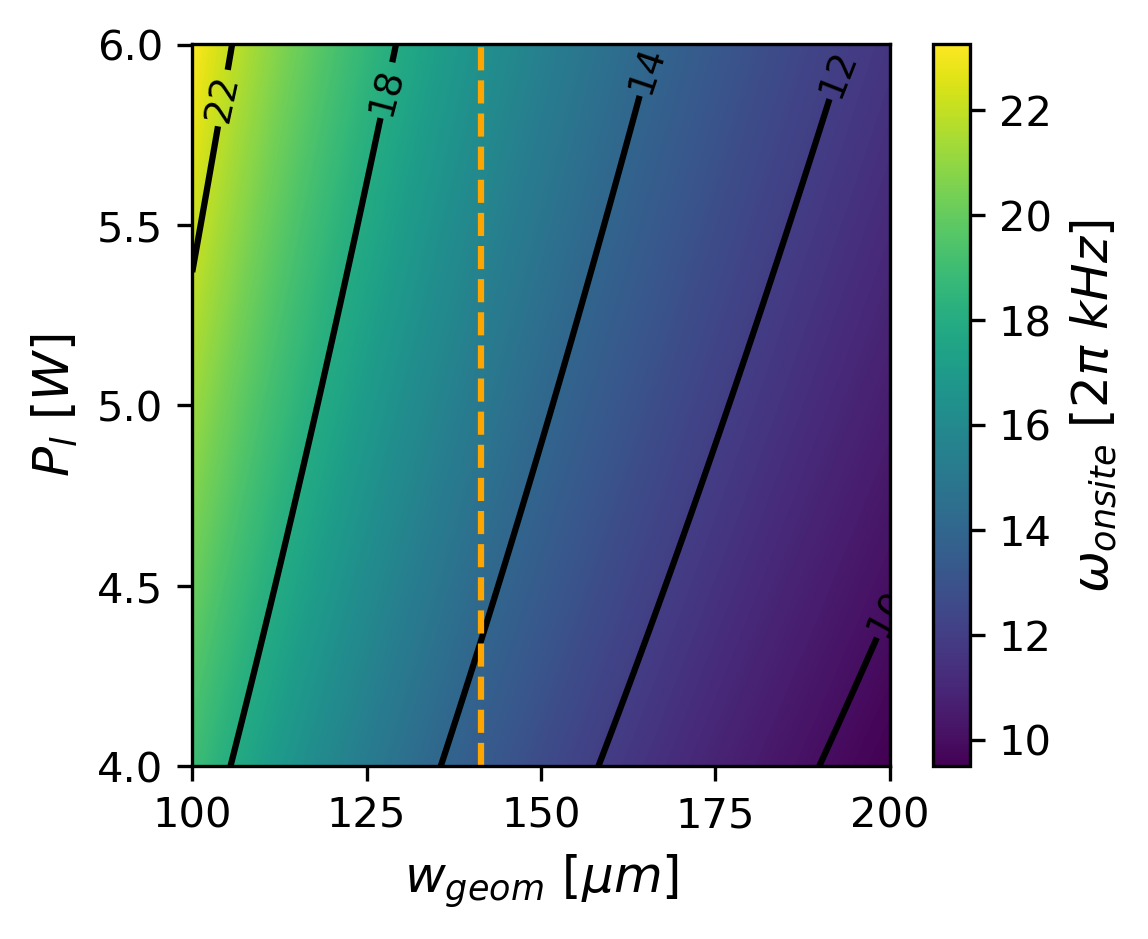

In [13]:
w_effs=np.linspace(100, 200,10001)*1E-6 #w_eff=sqrt(w_x*w_y)
powers=np.linspace(4, 6,1001)
x,y=np.meshgrid(w_effs,powers)


w_on=onsite_freq(y,x,wavelen_red, long_latt)/2/np.pi/1E3

fig, ax = plt.subplots(figsize=(lengo*ratio,lengo), dpi=300)
im = ax.imshow(w_on, origin="lower", aspect="auto")


plt.xticks(get_evenly_spaced(np.arange(len(w_effs)),5),(get_evenly_spaced(w_effs,5)*1E6).round(decimals=0).astype(int))
cs = ax.contour(w_on,[10,12,14,18,22,26], colors=['black'])
ax.clabel(cs, inline=True, fontsize=9)
ax.set_yticks(get_evenly_spaced(np.arange(len(powers)),5),(get_evenly_spaced(powers,5)).round(decimals=1))
ax.set_xlabel("$w_{geom} \ [\mu m]$", fontsize=12)
ax.set_ylabel("$P_{l}$ [$W$]",fontsize=12)
cbar=fig.colorbar(im,ax=ax)
cbar.set_label(label='$\omega_{onsite}$ [$2\pi \ kHz$]', size=12)
# plt.grid()
ax.set_ylim(0,len(powers))

# Plot our choice
w_eff_ours=np.sqrt(100*200)*1E-6
w_eff_where=round((w_eff_ours-w_effs[0])*len(w_effs)/(w_effs[-1]-w_effs[0]))
plt.plot(2*[w_eff_where,],[0,len(powers)], linestyle="--", color="orange", markersize=10)
# plt.show()
# plt.savefig("images/lparam_onsite.pdf",bbox_inches="tight")

## Confinement frequency (long lattice)

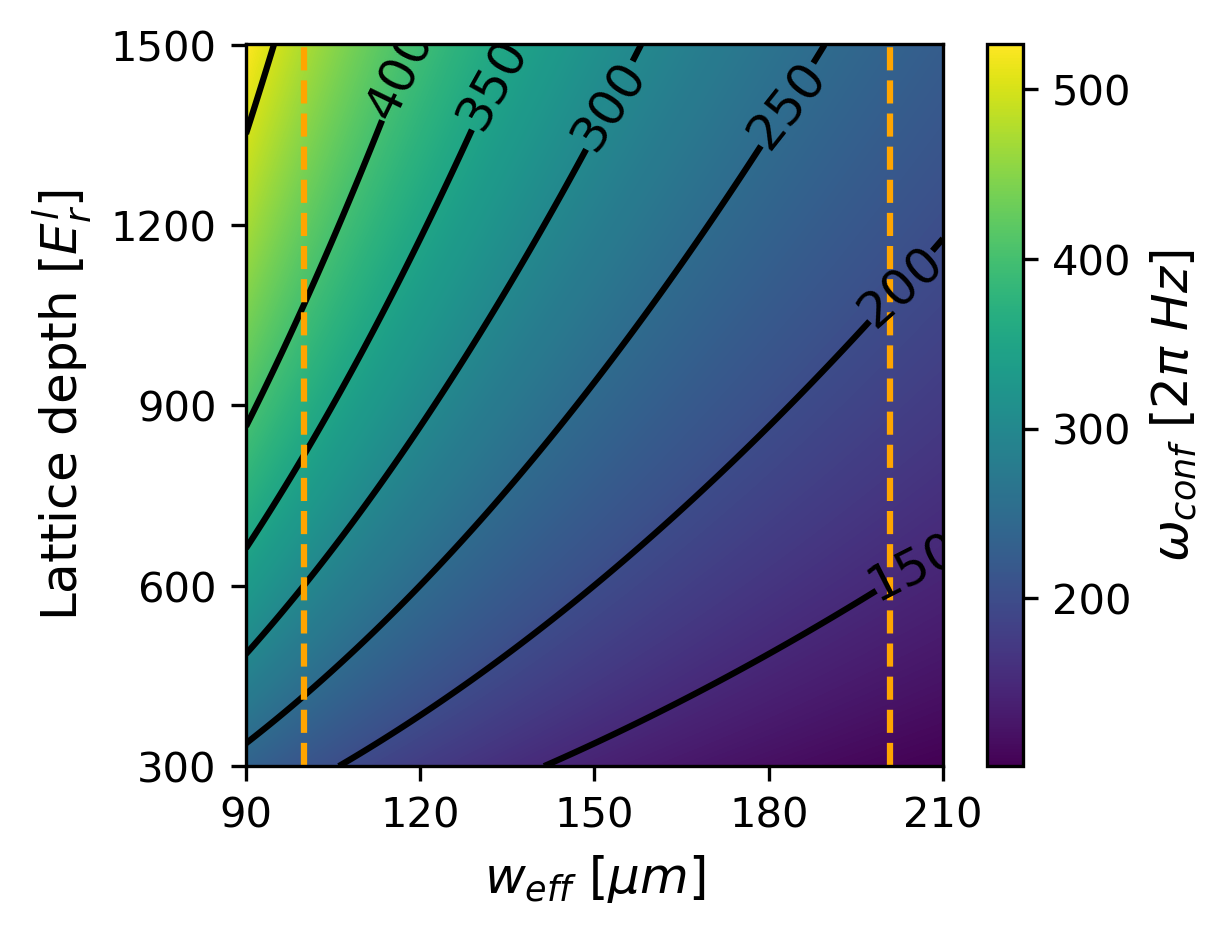

In [16]:
w_effs=np.linspace(90, 210,1001)*1E-6 #w_eff=sqrt(w_x*w_y)
U_rec=np.linspace(300, 1500,1001)
x,y=np.meshgrid(w_effs,U_rec)


w_conf=conf_freq(y,x,E_rl)/2/np.pi

fig, ax = plt.subplots(figsize=(lengo*ratio,lengo), dpi=300)
im = ax.imshow(w_conf, origin="lower", aspect="auto")


plt.xticks(get_evenly_spaced(np.arange(len(w_effs)),5),(get_evenly_spaced(w_effs,5)*1E6).round(decimals=0).astype(int))
cs = ax.contour(w_conf,[150,200,250,300,350,400,500], colors=['black'])
ax.clabel(cs, inline=True, fontsize=12)
ax.set_yticks(get_evenly_spaced(np.arange(len(U_rec)),5),(get_evenly_spaced(U_rec,5)).astype(int))
ax.set_xlabel("$w_{eff}$ [$\mu m$]", fontsize=12)
ax.set_ylabel("Lattice depth [$E_{r}^l$]", fontsize=12)
cbar=fig.colorbar(im,ax=ax)
cbar.set_label(label='$\omega_{conf}$ [$2\pi \ Hz$]', size=12)
# plt.grid()
ax.set_ylim(0,len(powers))

# # Plot our choice
w_eff_ours1=100*1E-6
w_eff_where1=round((w_eff_ours1-w_effs[0])*len(w_effs)/(w_effs[-1]-w_effs[0]))
plt.plot(2*[w_eff_where1,],[0,len(U_rec)], linestyle="--", color="orange", markersize=10)
w_eff_ours2=200*1E-6*(1/np.cos(alpha/2*2*np.pi/360))
w_eff_where2=round((w_eff_ours2-w_effs[0])*len(w_effs)/(w_effs[-1]-w_effs[0]))
plt.plot(2*[w_eff_where2,],[0,len(U_rec)], linestyle="--", color="orange", markersize=10)
# plt.show()
# plt.savefig("images/lparam_conf.pdf",bbox_inches="tight")

## Anticonfinement frequency (short lattice)

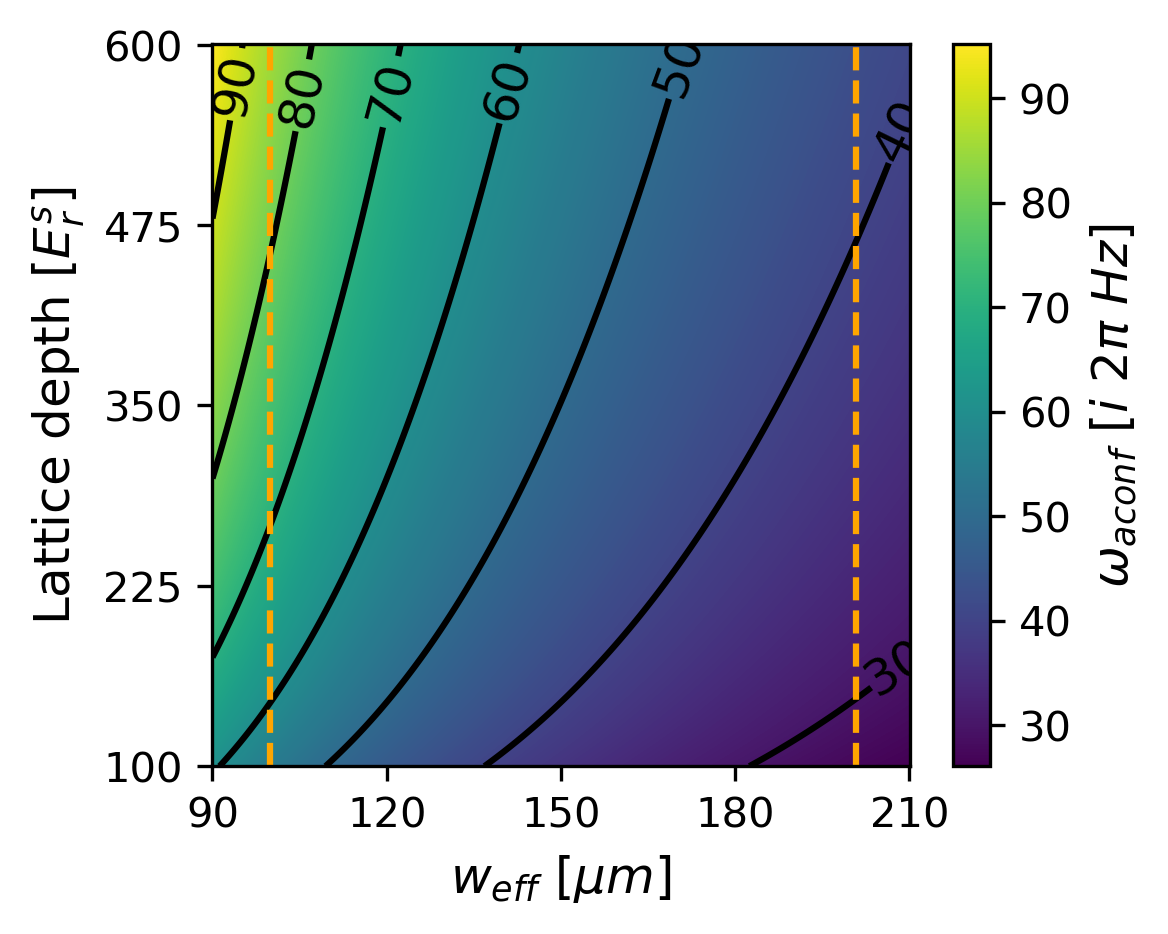

In [19]:
w_effs=np.linspace(90, 210,1001)*1E-6 #w_eff=sqrt(w_x*w_y)
U_rec=np.linspace(100, 600,1001)
x,y=np.meshgrid(w_effs,U_rec)


w_aconf=aconf_freq(y,x,E_rs)/2/np.pi

fig, ax = plt.subplots(figsize=(lengo*ratio,lengo), dpi=300)
im = ax.imshow(w_aconf, origin="lower", aspect="auto")


plt.xticks(get_evenly_spaced(np.arange(len(w_effs)),5),(get_evenly_spaced(w_effs,5)*1E6).round(decimals=0).astype(int))
cs = ax.contour(w_aconf,[30,40,50,60,70,80,90], colors=['black'])
ax.clabel(cs, inline=True, fontsize=12)
ax.set_yticks(get_evenly_spaced(np.arange(len(U_rec)),5),(get_evenly_spaced(U_rec,5)).astype(int))
ax.set_xlabel("$w_{eff}$ [$\mu m$]", fontsize=12)
ax.set_ylabel("Lattice depth [$E_{r}^s$]", fontsize=12)
cbar=fig.colorbar(im,ax=ax)
cbar.set_label(label='$\omega_{aconf}$ [$i \ 2\pi \ Hz$]', size=12)
# plt.grid()
ax.set_ylim(0,len(powers))

# # Plot our choice
w_eff_ours1=100*1E-6
w_eff_where1=round((w_eff_ours1-w_effs[0])*len(w_effs)/(w_effs[-1]-w_effs[0]))
plt.plot(2*[w_eff_where1,],[0,len(U_rec)], linestyle="--", color="orange", markersize=10)
w_eff_ours2=200*1E-6*(1/np.cos(alpha/2*2*np.pi/360))
w_eff_where2=np.round((w_eff_ours2-w_effs[0])*len(w_effs)/(w_effs[-1]-w_effs[0]))
plt.plot(2*[w_eff_where2,],[0,len(U_rec)], linestyle="--", color="orange", markersize=10)
# plt.savefig("images/lparam_aconf.pdf",bbox_inches="tight")

# Imbalance

In [21]:
def michel_contrast(gamma,u):
    return 2*u*gamma/(1+gamma**2)

gamma=np.linspace(0.5,1,101)
u=np.linspace(0.5,1,101)
gamma_1, u_1 = np.meshgrid(gamma, u)
contr=michel_contrast(gamma_1,u_1)

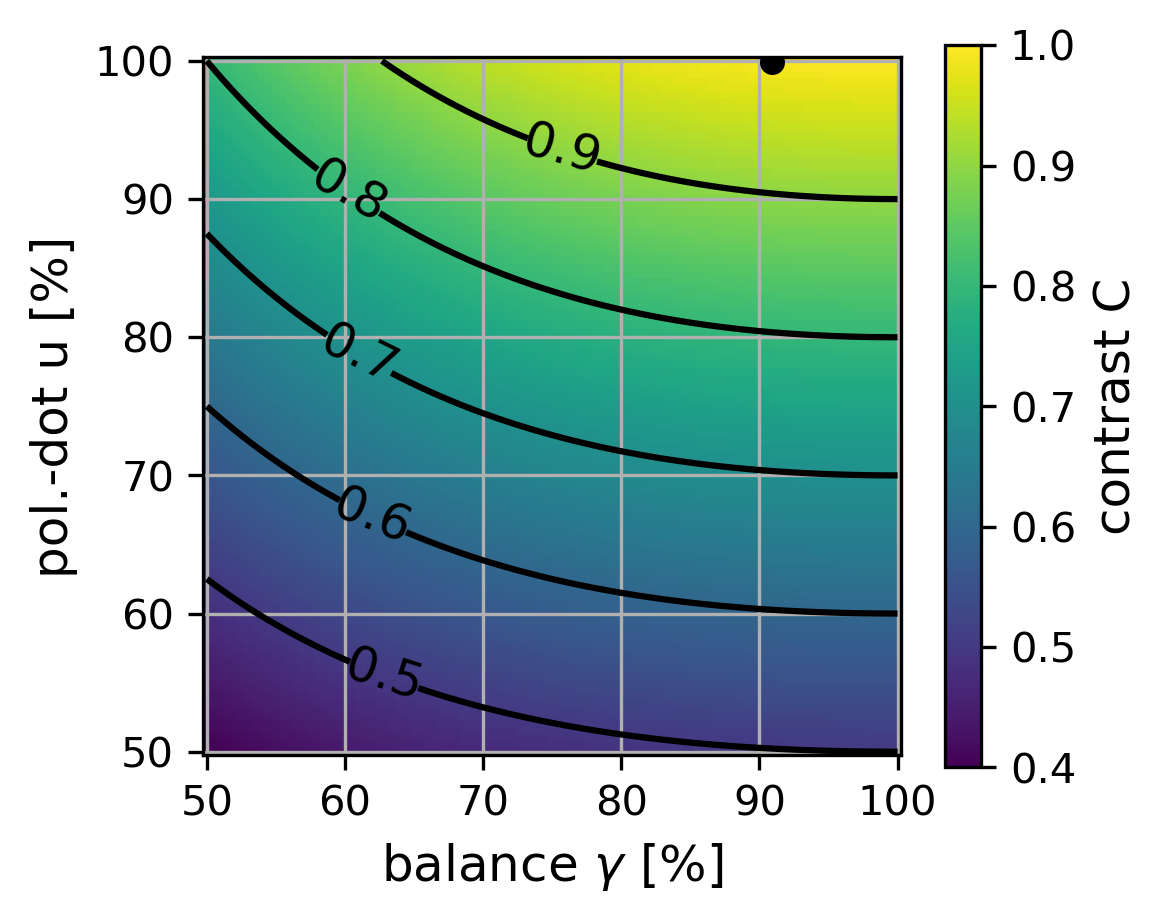

In [25]:
fig, ax = plt.subplots(figsize=(lengo*ratio,lengo), dpi=300)
im = ax.imshow(contr, origin="lower")
cs = ax.contour(contr,[0.5,0.6,0.7,0.8,0.9], colors=['black'])
ax.clabel(cs, inline=True, fontsize=12)
xticks = [0,20,40,60,100]
yticks = [0,20,40,60,100]
plt.xticks([0,20,40,60,80,100],(gamma[::20]*100).astype("int"))
plt.yticks([0,20,40,60,80,100],(u[::20]*100).astype("int"))
plt.xlabel("balance $\gamma$ [%]", fontsize=12)
plt.ylabel("pol.-dot u [%]", fontsize=12)
cbar=fig.colorbar(im)
cbar.set_label(label='contrast C', size=12)

plt.grid()

# Plot our imbalance
z_latt_pol=[81.81,99.84] # alpha, u
plt.plot([z_latt_pol[0]],[z_latt_pol[1]], linestyle="None", marker=".", color="black", markersize=10)


# plt.savefig("images/contrast-imbalance.pdf",bbox_inches="tight")
# plt.show()